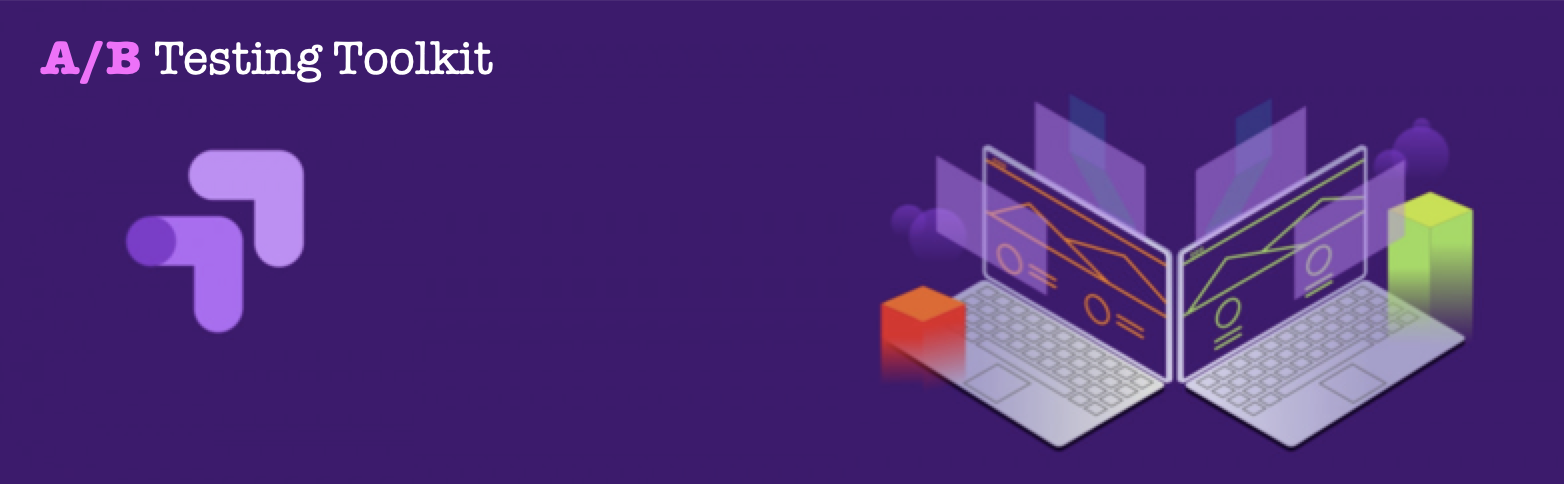

# Causal Impact - Headline Testing Analysis (Bristol Post)


In [2]:
! pip install pycausalimpact

In [50]:
## Import packages

import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact
import seaborn as sb
from matplotlib import rcParams
import matplotlib.pyplot as plt

In [39]:
# figure size in inches

rcParams['figure.figsize'] = 14, 10

In [40]:
## Import data

local = 'Causal_impact_bristol_headlines.xlsx'
df_dates = pd.read_excel(local)
df_dates.head(100)

,date,y,X,X1,X2,X3,X4
0,2018-01-08,2.22,266061,350706,1682723,1371869,1.23
1,2018-01-09,2.21,262389,330806,1740748,1384424,1.26
2,2018-01-10,1.91,249291,304384,1597622,1274995,1.25
3,2018-01-11,1.86,291289,356944,1709132,1351274,1.26
4,2018-01-12,2.33,223230,279617,1581350,1220933,1.30
...,...,...,...,...,...,...,...
95,2018-04-13,1.98,268667,308687,1213890,963681,1.26
96,2018-04-14,1.58,273806,306368,1090559,898259,1.21
97,2018-04-15,1.40,468107,514712,1066193,844244,1.26
98,2018-04-16,1.91,243804,286522,1159689,897489,1.29


In [41]:
## Format data

df = df_dates[['y', 'X', 'X1', 'X2', 'X3', 'X4']]

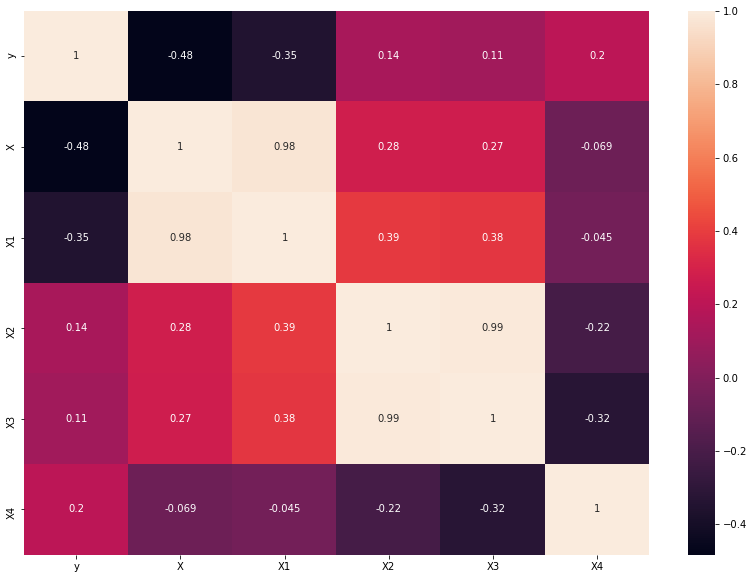

In [42]:
## Plot correlation matrix

corr = df.corr()
sb.heatmap(corr, annot=True)


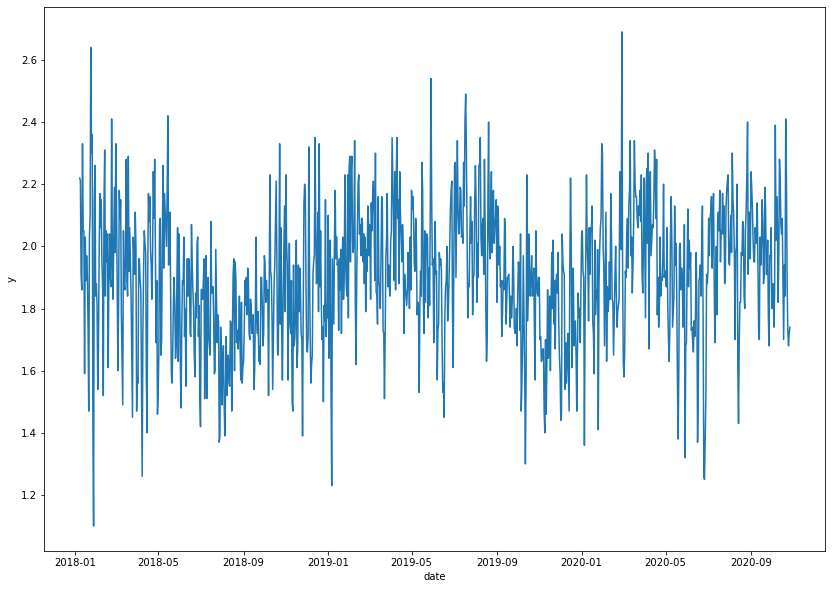

In [58]:
## plot y over time

sb.lineplot(x = "date", y = "y", data = df_dates)

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1.85               260.44
Prediction (s.d.)         1.86 (0.03)        261.64 (4.46)
95% CI                    [1.79, 1.92]       [252.87, 270.34]

Absolute effect (s.d.)    -0.01 (0.03)       -1.2 (4.46)
95% CI                    [-0.07, 0.05]      [-9.9, 7.57]

Relative effect (s.d.)    -0.46% (1.7%)      -0.46% (1.7%)
95% CI                    [-3.78%, 2.89%]    [-3.78%, 2.89%]

Posterior tail-area probability p: 0.4
Posterior prob. of a causal effect: 59.84%

For more details run the command: print(impact.summary('report'))
Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 1.85. In the absence of an
intervention, we would have expected an average response of 1.86.
The 95% interval of this counterfactual prediction is [1.79, 1.92].
Subtracting this prediction from the observed response yields
a

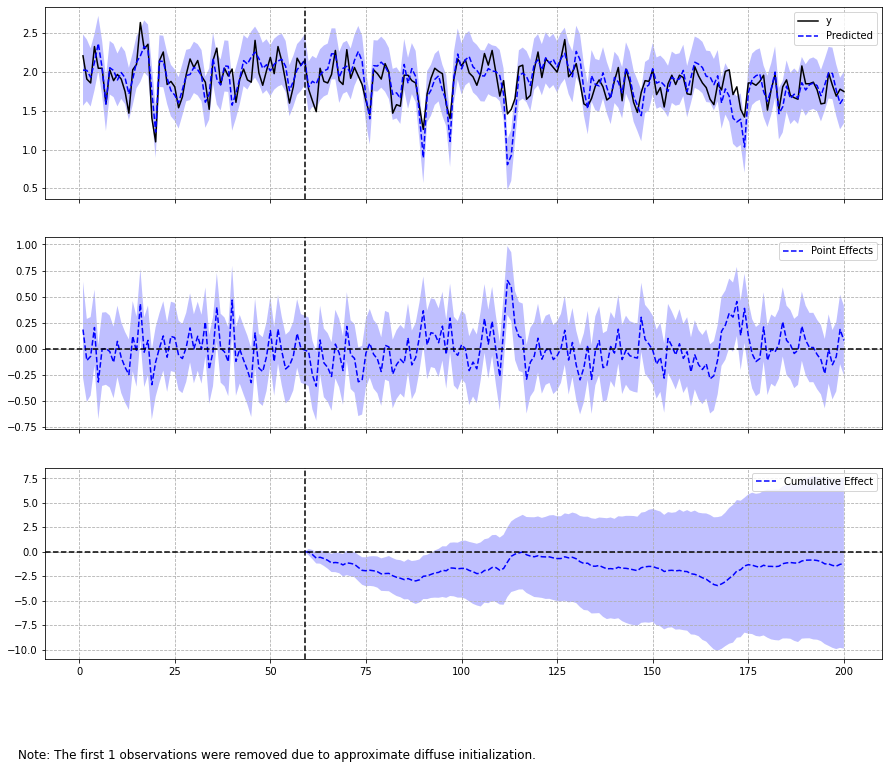

In [43]:
## Perform CausalImpact report and statistic

pre_period = [0, 59]
post_period = [60, 200]

ci = CausalImpact(df, pre_period, post_period)
print(ci.summary())
print(ci.summary(output='report'))
ci.plot()